# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/francene/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
q="bitcoin",language = 'en', sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
q="ethereum",language = 'en', sort_by="relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []
for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858
2,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,,0.0000,0.000,0.000,0.000
4,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []
for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
2,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
3,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916
4,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.005180,0.046750,0.041700,0.861600
std,0.430775,0.073919,0.085443,0.232505
min,-0.906200,0.000000,0.000000,0.000000
25%,-0.062500,0.000000,0.000000,0.824250
50%,0.000000,0.000000,0.000000,0.935000
75%,0.025675,0.077750,0.023750,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.217115,0.076950,0.027150,0.895950
std,0.384969,0.067969,0.046137,0.073923
min,-0.557400,0.000000,0.000000,0.754000
25%,0.000000,0.040500,0.000000,0.856000
50%,0.296000,0.077000,0.000000,0.916500
75%,0.449150,0.090250,0.051500,0.938250
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum.

Q: Which coin had the highest compound score?

A: They tied.

Q. Which coin had the highest positive score?

A: They tied.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append('...')
stop.append('it')
stop.append('u')

In [52]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
      
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
        
    # Remove the stop words
    words = list(filter(lambda w: w.lower() not in stop, words))

    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word).lower() for word in words]
    
    return tokens

In [53]:
# Create a new tokens column for Bitcoin
btc['tokens'] = btc['text'].apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
1,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, twitter, hac..."
2,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb..."
3,,0.0000,0.000,0.000,0.000,[]
4,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tl, dr, enter, complete, bitcoin, btc, invest..."


In [54]:
# Create a new tokens column for Ethereum
eth['tokens'] = eth['text'].apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
1,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdown, worldwide, photo, ..."
2,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"['s, everything, need, know, non-fungible, tok..."
3,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[opensea, one, handful, nft, marketplace, expl..."
4,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [55]:
from collections import Counter
from nltk import ngrams

In [56]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc['text'].str.cat()),N)
Counter(grams).most_common(20)

[(('char', 'reuters'), 8),
 (('reuters', 'staff'), 8),
 (('staff', 'file'), 7),
 (('file', 'photo'), 7),
 (('virtual', 'currency'), 7),
 (('illustration', 'taken'), 7),
 (('picture', 'illustration'), 5),
 (('photo', 'collection'), 4),
 (('collection', 'bitcoin'), 4),
 (('bitcoin', 'virtual'), 4),
 (('currency', 'token'), 4),
 (('token', 'displayed'), 4),
 (('displayed', 'picture'), 4),
 (('taken', 'dec.'), 4),
 (('dec.', '8'), 4),
 (('8', '2017'), 4),
 (('2017', 'reuters/benoit'), 4),
 (('reuters/benoit', 'tessier/illustration'), 3),
 (('tessier/illustration', 'reuters'), 3),
 (('currency', 'bitcoin'), 3)]

In [57]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth['text'].str.cat()),N)
Counter(grams).most_common(20)

[(('non-fungible', 'token'), 3),
 (('char', 'nfts'), 3),
 (('char', 'reuters'), 3),
 (('reuters', 'staff'), 3),
 (('everything', 'need'), 2),
 (('latest', 'cryptocurrency'), 2),
 (('kings', 'leon'), 2),
 (('token', '—'), 2),
 (('cryptocurrency', 'platform'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('hong', 'kong'), 2),
 (('char', 'tl'), 2),
 (('tl', 'dr'), 2),
 (('investment', 'giveaway'), 2),
 (('famed', 'auction'), 1),
 (('auction', 'house'), 1),
 (('house', 'christies'), 1),
 (('christies', 'sold'), 1),
 (('sold', 'first'), 1),
 (('first', 'purely'), 1)]

In [58]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [59]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc['text'].str.cat())
token_count(all_tokens,10)

[('char', 19),
 ('reuters', 15),
 ('bitcoin', 12),
 ('photo', 10),
 ('staff', 8),
 ('file', 7),
 ('virtual', 7),
 ('currency', 7),
 ('illustration', 7),
 ('taken', 7)]

In [60]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth['text'].str.cat())
token_count(all_tokens,10)

[('char', 19),
 ('reuters', 8),
 ('cryptocurrency', 8),
 ('new', 8),
 ('digital', 5),
 ('million', 5),
 ('nfts', 5),
 ('bitcoin', 5),
 ("'s", 4),
 ('token', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [71]:
def wordcloud(text, title=''):
    df_cloud = WordCloud(width=500, colormap = 'RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis('off')
    fontdict = {"fontsize":48, "fontweight":"bold"}
    plt.title(title,fontdict=fontdict)
    plt.show()

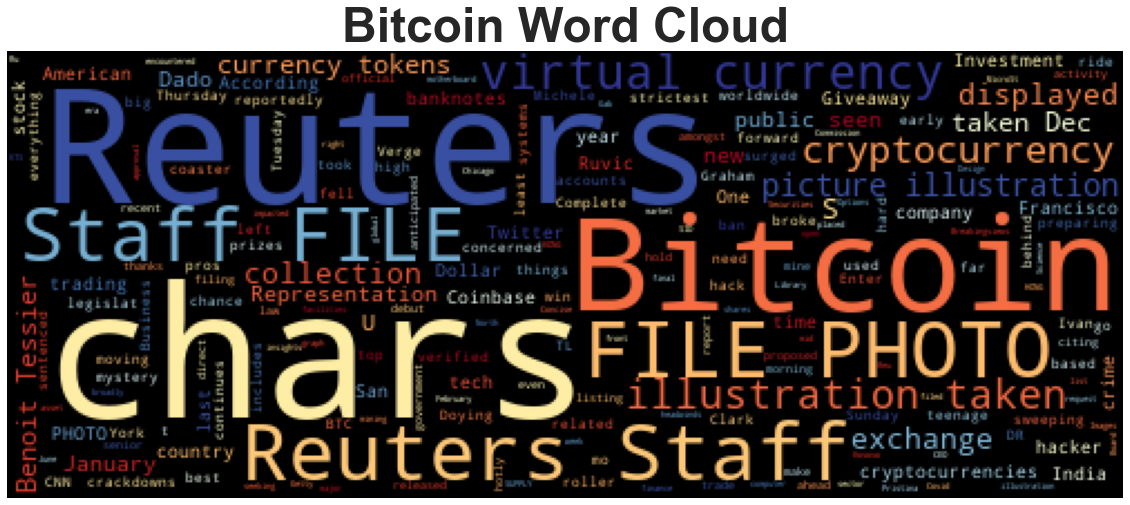

In [72]:
# Generate the Bitcoin word cloud
wordcloud(btc['text'].str.cat(), title="Bitcoin Word Cloud")

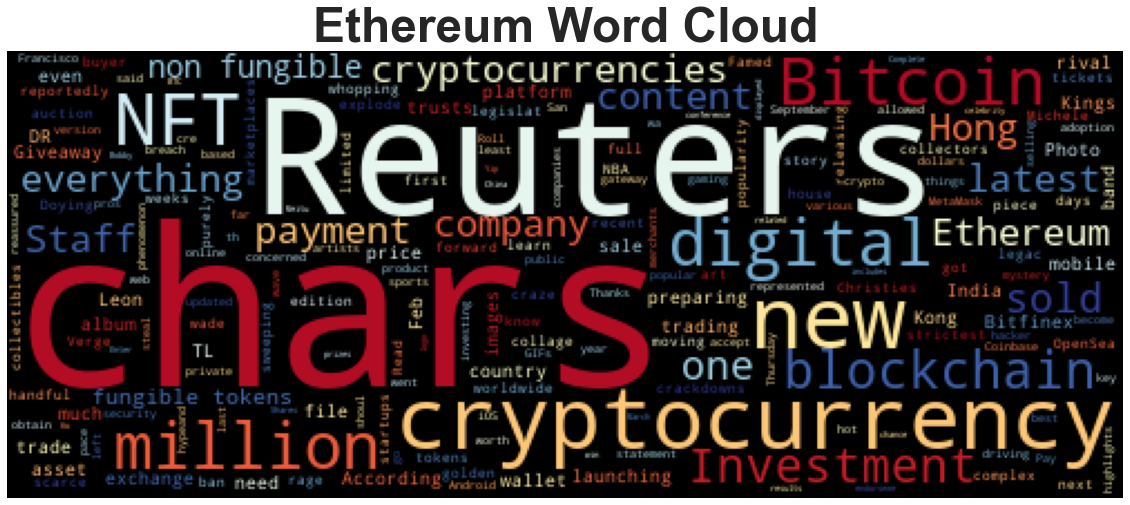

In [73]:
# Generate the Ethereum word cloud
wordcloud(eth['text'].str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [75]:
import spacy
from spacy import displacy

In [76]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [77]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [78]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc['text'].str.cat()
all_btc_text

"One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker who broke\r\n into Twitters systems, took over verified accounts, and used t… [+2552 chars]Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars]New York (CNN Business)Bitcoin's roller coaster ride continues. The top cryptocurrency surged to a new all-time high above $58

In [79]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [81]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [82]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
India GPE
Reuters ORG
Coinbase WORK_OF_ART
American NORP
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
week of February DATE
North American NORP
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
KTS Design/Science Photo Library/Getty Images ORG
The Chicago Board Options Exchange ORG
the US Securities and Exchange Commission ORG
2018 DATE
San Francisco GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reute

---

### Ethereum NER

In [85]:
# Concatenate all of the Ethereum text together
all_eth_text = eth['text'].str.cat()
all_eth_text

'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new startups have be… [+2529 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for

In [86]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [87]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [88]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
chars]MetaMask ORG
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
over $12,000 MONEY
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
Reuters ORG
SINGAPORE GPE
Feb 23 DATE
Reuters ORG
as much as 6% PERCENT
Asia LOC
Tuesday DATE
around $52,000 MONEY
India GPE
Reuters ORG
Kings ORG
Leon PRODUCT
more than $2 million MONEY
Getty Images PERSON
Two CARDINAL
Ethereum PERSON
The Blockchain Certification Advanced Training Bundle ORG
20.60 MONEY
as of Feb. 25 DATE
96% PERCENT
Grayscale Investments ORG
Wedn

---